# UNIVERSIDADE FEDERAL DO AMAPÁ

## 1.1 MANIPULAÇÃO DA BDGD VIA GEOPANDAS

Para acesso e manipulação de dados da rede via bdgd, utilizaremos o pacote geopandas.

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

Definição do caminho da base de dados georeferenciada (BDGD):

In [ ]:
bdgd_path = '/content/drive/MyDrive/Colab_Notebooks/CEA_Equatorial_31_2024-12-31_V11_20250530-1220.gdb'

Carregando as camadas e tabelas de dados:

In [ ]:
# Dados das Subestações
gdf_sub = gpd.read_file(bdgd_path, engine='pyogrio', layer='SUB')
# Dados dos alimentadores de MT
gdf_ctmt = gpd.read_file(bdgd_path, engine='pyogrio', layer='CTMT')
# Segmentos de linha de MT
gdf_ssdmt = gpd.read_file(bdgd_path, engine='pyogrio', layer='SSDMT')
# Curvas de Cargas
gdf_crvcrg = gpd.read_file(bdgd_path, engine='pyogrio', layer='CRVCRG')

In [ ]:
gdf_ctmt
#gdf_sub['COD_ID']

<Axes: >

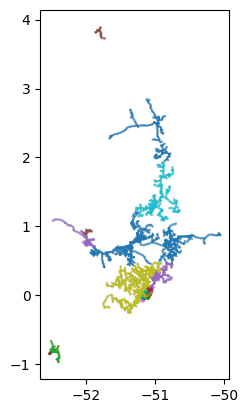

In [ ]:
gdf_ssdmt.plot(column='CTMT')

<Axes: >

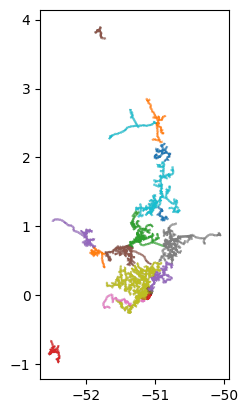

In [ ]:
gdf_ssdmt.plot(column='SUB')

In [ ]:
sub = gdf_sub['COD_ID']
list(sub)

['POR',
 'PGR',
 'TRV',
 'CPX',
 'APO',
 'CAL',
 'CY1',
 'TAG',
 'JAR',
 'EQT',
 'STN',
 'AMP',
 'MCP',
 'SRT',
 'NAV',
 'LT1',
 'SEI',
 'RPT',
 'CY',
 'OYP',
 'SJO',
 'MOV']

In [ ]:

fig, ax = plt.subplots(figsize=(16,10))
gdf_ssdmt.plot(column='SUB',
               legend=True,
               legend_kwds={'loc': 'lower right',
                            'bbox_to_anchor':(0, .5),
                            'ncols': 2,
                            'frameon':False},
               linewidth=1.0, categorical=True, cmap='Spectral', ax=ax
               )
#ax.legend()
#plt.show()

Filtra os alimentadores pertencentes à subestação santa rita (COD_ID = SRT)

In [ ]:
filtro = gdf_ctmt['SUB']=='SRT'
print(filtro)

In [ ]:
gdf_ctmt[filtro]['COD_ID'].to_list()

In [ ]:
gdf_ctmt.query("SUB == 'SRT'")['COD_ID']

filtra segmentos linha pertencentes ao alimentador 'SRT01P8'

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))
#gdf_ssdmt[gdf_ssdmt['CTMT']=='SRT01P8'].plot(ax=ax)
gdf_ssdmt.query("CTMT=='SRT01P8'").plot(ax=ax) # filtra segmentos linha pertencentes ao alimentador 'SRT01P8'
gdf_sub[gdf_sub['COD_ID']=='SRT'].plot(ax=ax)
plt.show()

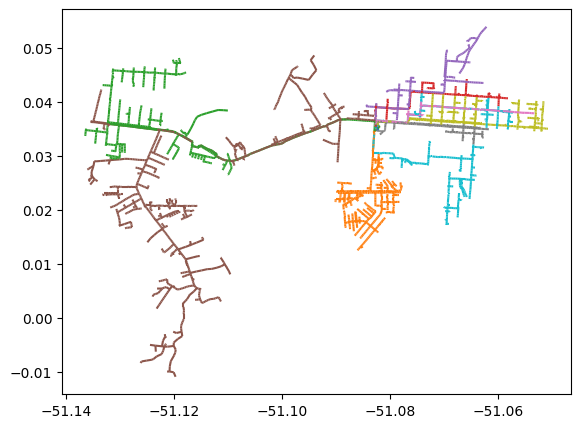

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))
gdf_ssdmt.query("SUB=='SRT'").plot(ax=ax, column='CTMT')
gdf_sub[gdf_sub['COD_ID']=='SRT'].plot(ax=ax)
plt.show()

In [ ]:
gdf_crvcrg

In [ ]:
#gdf_crvcrg[gdf_crvcrg['COD_ID']=='RES-Tipo4']
gdf_crvcrg.query("COD_ID=='RES-Tipo4'")

,COD_ID,DIST,TIP_DIA,POT_01,POT_02,POT_03,POT_04,POT_05,POT_06,POT_07,POT_08,POT_09,POT_10,POT_11,POT_12,POT_13,POT_14,POT_15,POT_16,POT_17,POT_18,POT_19,POT_20,POT_21,POT_22,POT_23,POT_24,POT_25,POT_26,POT_27,POT_28,POT_29,POT_30,POT_31,POT_32,POT_33,POT_34,POT_35,POT_36,POT_37,POT_38,POT_39,POT_40,POT_41,POT_42,POT_43,POT_44,POT_45,POT_46,POT_47,POT_48,POT_49,POT_50,POT_51,POT_52,POT_53,POT_54,POT_55,POT_56,POT_57,POT_58,POT_59,POT_60,POT_61,POT_62,POT_63,POT_64,POT_65,POT_66,POT_67,POT_68,POT_69,POT_70,POT_71,POT_72,POT_73,POT_74,POT_75,POT_76,POT_77,POT_78,POT_79,POT_80,POT_81,POT_82,POT_83,POT_84,POT_85,POT_86,POT_87,POT_88,POT_89,POT_90,POT_91,POT_92,POT_93,POT_94,POT_95,POT_96,DESCR,GRU_TEN
1,RES-Tipo4,31,DO,8259.323998,7901.353066,7933.223076,7917.358849,7888.587792,7619.733665,7392.863334,7255.613456,7307.760307,6608.219443,6926.860618,6671.959876,6991.270988,7131.642387,6934.234275,7066.910148,6928.677482,6982.599540,6555.997351,6869.023154,6579.049094,6596.629828,6894.278648,6512.912223,6586.973441,6294.601553,6109.903494,5850.834066,5509.513311,5393.819646,5055.369497,4910.789891,4663.970753,4018.432087,4297.306034,4297.526402,3740.181385,3553.405155,3750.303684,4133.343418,3165.101260,3941.570515,3094.338000,3260.615375,3791.006901,3429.765079,3402.047321,3864.593510,3554.644794,4514.787373,4639.093526,4583.843114,4935.997441,5330.606832,4912.265157,5131.956243,5525.339346,5053.646016,4768.872212,4878.235356,4935.198888,4808.224019,4766.875691,4866.646001,5498.010915,5956.145514,5829.350470,5763.852453,4578.287953,3490.295906,3487.742042,3920.617559,4480.469689,4709.338784,5301.821496,4625.966988,4980.411374,4918.400121,5663.961874,5722.084268,6385.764365,6324.673804,5952.471689,6409.798045,7716.093027,7508.785928,7263.183452,7340.242443,7930.266243,8571.575845,8352.241524,8738.303536,8205.473061,8257.273034,8141.962975,7469.808738,,BT
40,RES-Tipo4,31,DU,8026.708535,7812.012871,7479.559913,7619.046577,7472.195015,7437.010338,7788.016426,7738.667122,8054.353218,7874.811318,7822.279350,7717.199959,7564.962593,8049.884026,8032.743080,7812.763161,7864.118019,7879.541802,8050.056465,8110.352150,8155.117272,7706.255104,7432.768623,7225.932685,7089.282584,6301.720145,5935.226463,5591.366400,4588.468480,4346.763260,3524.218479,2843.258696,2817.874007,3042.160659,2719.042300,2315.335604,2122.616898,1670.281755,1615.851213,1567.150032,1745.320066,2574.409440,2987.450046,3146.177701,3677.485103,3728.251652,3515.480642,3213.455610,2961.610009,3085.385610,3887.961037,5572.895170,6838.655822,7318.009956,8076.598755,8149.189865,8463.479829,8748.515695,8330.518792,6540.027152,6889.297462,7581.827316,7432.125969,7597.309913,7838.912438,7249.950691,6070.252585,5917.580542,5195.129217,5351.327539,4974.244531,5042.171903,5405.800863,5431.899168,6323.487723,6867.167121,7384.989112,9068.962945,9545.296869,9446.167291,8291.069817,8240.440712,8043.129402,8635.911202,8992.522088,9074.900583,10163.564555,9254.502374,9062.718606,9167.583383,9096.275430,8374.970727,7804.565727,8096.927025,7800.245750,7703.209679,,BT
64,RES-Tipo4,31,SA,7504.733070,8529.214776,8121.840279,8370.350442,8147.801766,8467.258324,8565.170571,8478.326272,8210.619912,8372.629586,8210.594490,8318.956673,8070.846215,7928.475960,8048.163369,7808.435188,7762.114357,8043.778420,7220.705543,7540.342750,7284.817878,7276.975318,7264.636283,7118.090888,6621.900763,5786.534674,5566.181814,5305.825857,4659.728452,5201.373220,4745.152577,4550.064885,4536.632069,4767.001775,4939.849340,4756.817113,4997.995549,5328.892080,5633.639410,4342.072026,3890.238392,3678.796398,4050.335087,5729.277861,6111.386137,6159.607691,6330.515025,5608.770895,5661.690134,4897.436196,5381.286150,5461.753618,6033.762823,5893.604323,5792.008308,5232.139776,4649.543525,4804.279197,5292.019081,5718.736915,5292.967887,6395.142462,6093.361885,5965.318689,5919.923025,6362.466635,6021.683237,5225.632667,5189.838325,4978.778157,4618.934668,4178.797560,3909.273865,4698.059647,5267.322080,5168.469556,5625.099541,

In [ ]:
cols = [f'POT_{i:02d}' for i in range(1,97)]
print(cols)

['POT_01', 'POT_02', 'POT_03', 'POT_04', 'POT_05', 'POT_06', 'POT_07', 'POT_08', 'POT_09', 'POT_10', 'POT_11', 'POT_12', 'POT_13', 'POT_14', 'POT_15', 'POT_16', 'POT_17', 'POT_18', 'POT_19', 'POT_20', 'POT_21', 'POT_22', 'POT_23', 'POT_24', 'POT_25', 'POT_26', 'POT_27', 'POT_28', 'POT_29', 'POT_30', 'POT_31', 'POT_32', 'POT_33', 'POT_34', 'POT_35', 'POT_36', 'POT_37', 'POT_38', 'POT_39', 'POT_40', 'POT_41', 'POT_42', 'POT_43', 'POT_44', 'POT_45', 'POT_46', 'POT_47', 'POT_48', 'POT_49', 'POT_50', 'POT_51', 'POT_52', 'POT_53', 'POT_54', 'POT_55', 'POT_56', 'POT_57', 'POT_58', 'POT_59', 'POT_60', 'POT_61', 'POT_62', 'POT_63', 'POT_64', 'POT_65', 'POT_66', 'POT_67', 'POT_68', 'POT_69', 'POT_70', 'POT_71', 'POT_72', 'POT_73', 'POT_74', 'POT_75', 'POT_76', 'POT_77', 'POT_78', 'POT_79', 'POT_80', 'POT_81', 'POT_82', 'POT_83', 'POT_84', 'POT_85', 'POT_86', 'POT_87', 'POT_88', 'POT_89', 'POT_90', 'POT_91', 'POT_92', 'POT_93', 'POT_94', 'POT_95', 'POT_96']


In [ ]:
gdf_crvcrg.query("TIP_DIA=='DO' and COD_ID=='RES-Tipo4'")[cols]

,POT_01,POT_02,POT_03,POT_04,POT_05,POT_06,POT_07,POT_08,POT_09,POT_10,POT_11,POT_12,POT_13,POT_14,POT_15,POT_16,POT_17,POT_18,POT_19,POT_20,POT_21,POT_22,POT_23,POT_24,POT_25,POT_26,POT_27,POT_28,POT_29,POT_30,POT_31,POT_32,POT_33,POT_34,POT_35,POT_36,POT_37,POT_38,POT_39,POT_40,POT_41,POT_42,POT_43,POT_44,POT_45,POT_46,POT_47,POT_48,POT_49,POT_50,POT_51,POT_52,POT_53,POT_54,POT_55,POT_56,POT_57,POT_58,POT_59,POT_60,POT_61,POT_62,POT_63,POT_64,POT_65,POT_66,POT_67,POT_68,POT_69,POT_70,POT_71,POT_72,POT_73,POT_74,POT_75,POT_76,POT_77,POT_78,POT_79,POT_80,POT_81,POT_82,POT_83,POT_84,POT_85,POT_86,POT_87,POT_88,POT_89,POT_90,POT_91,POT_92,POT_93,POT_94,POT_95,POT_96
1,8259.323998,7901.353066,7933.223076,7917.358849,7888.587792,7619.733665,7392.863334,7255.613456,7307.760307,6608.219443,6926.860618,6671.959876,6991.270988,7131.642387,6934.234275,7066.910148,6928.677482,6982.59954,6555.997351,6869.023154,6579.049094,6596.629828,6894.278648,6512.912223,6586.973441,6294.601553,6109.903494,5850.834066,5509.513311,5393.819646,5055.369497,4910.789891,4663.970753,4018.432087,4297.306034,4297.526402,3740.181385,3553.405155,3750.303684,4133.343418,3165.10126,3941.570515,3094.338,3260.615375,3791.006901,3429.765079,3402.047321,3864.59351,3554.644794,4514.787373,4639.093526,4583.843114,4935.997441,5330.606832,4912.265157,5131.956243,5525.339346,5053.646016,4768.872212,4878.235356,4935.198888,4808.224019,4766.875691,4866.646001,5498.010915,5956.145514,5829.35047,5763.852453,4578.287953,3490.295906,3487.742042,3920.617559,4480.469689,4709.338784,5301.821496,4625.966988,4980.411374,4918.400121,5663.961874,5722.084268,6385.764365,6324.673804,5952.471689,6409.798045,7716.093027,7508.785928,7263.183452,7340.242443,7930.266243,8571.575845,8352.241524,8738.303536,8205.473061,8257.273034,8141.962975,7469.808738


In [ ]:
cols = [f'POT_{i:02d}' for i in range(1,97)]
p_do = gdf_crvcrg.query("TIP_DIA=='DO' and COD_ID=='RES-Tipo4'")[cols].values[0,:]
p_du = gdf_crvcrg.query("TIP_DIA=='DU' and COD_ID=='RES-Tipo4'")[cols].values[0,:]
p_sa = gdf_crvcrg.query("TIP_DIA=='SA' and COD_ID=='RES-Tipo4'")[cols].values[0,:]

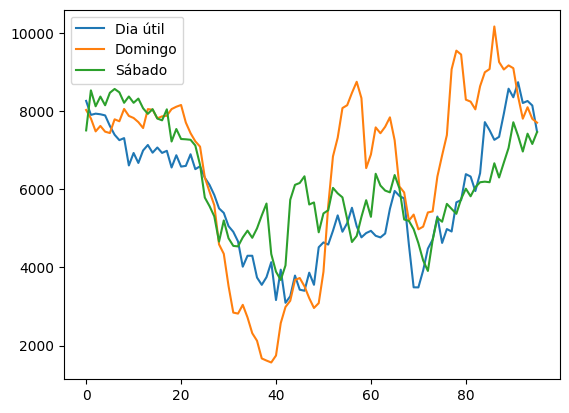

In [ ]:
plt.plot(p_do, label='Dia útil')
plt.plot(p_du, label='Domingo')
plt.plot(p_sa, label='Sábado')
plt.legend()

In [ ]:
num_se = gdf_sub['COD_ID'].count()
se_list = gdf_sub['COD_ID'].tolist()

Calcula a quantidade de alimentadores por subestação

In [ ]:
gdf_ctmt.groupby('SUB')['COD_ID'].count().reset_index()

,SUB,COD_ID
0,AMP,1
1,CAL,1
2,CPX,3
3,CY,2
4,CY1,1
5,EQT,13
6,JAR,4
7,MCP,11
8,NAV,5
9,OYP,4


In [ ]:
gdf_ssdmt.query("FAS_CON=='A' or FAS_CON=='B' or FAS_CON=='C'").groupby(['SUB', 'CTMT', 'TIP_INST'])['COD_ID'].count()

SUB  CTMT     TIP_INST  
AMP  AMP01Y2  RD_AER_RUR    1425
              RD_AER_URB      23
APO  TAG01Y1  RD_AER_RUR     448
CAL  CAL01C1  RD_AER_RUR    1174
              RD_AER_URB      29
                            ... 
TAG  TAG01Y1  RD_AER_URB      88
     TAG01Y2  RD_AER_RUR    1240
              RD_AER_URB      86
TRV  CAL01C1  RD_AER_RUR     289
              RD_AER_URB       9
Name: COD_ID, Length: 97, dtype: int64

In [ ]:
gdf_ssdmt.query("FAS_CON=='A' or FAS_CON=='B' or FAS_CON=='C'")['CTMT'].unique()

array(['NAV01N1', 'CAL01C1', 'EQT01C7', 'MCP01W4', 'STN01W3', 'STN01S6',
       'CY109F1', 'TAG01Y2', 'STN01S3', 'MCP01W3', 'SRT01F2', 'CY01C3',
       'SRT01P3', 'CPX01C1', 'OYP01Y2', 'CPX01C3', 'AMP01Y2', 'CPX01C2',
       'TAG01Y1', 'OYP01Y4', 'EQT01C1', 'OYP01Y3', 'EQT01Y1', 'JAR01F2',
       'MCP01C5', 'EQT01Y6', 'EQT01Y5', 'EQT01C8', 'MCP01C4', 'MCP01C1',
       'MCP01C2', 'MCP01W2', 'NAV01N3', 'STN01S7', 'POR01V2', 'NAV01N2',
       'STN01S5', 'EQT01C2', 'EQT01Y2', 'EQT01C4', 'EQT01Y4', 'STN01S4',
       'POR01V3', 'JAR01F1', 'MCP01C7', 'SRT01F5', 'SRT01P9', 'JAR01F3',
       'STN01S8', 'STN01S9', 'SRT01P2', 'SJO01S4', 'SJO01S5', 'STN01S2',
       'SRT01P5', 'STN01W1', 'STN01W2'], dtype=object)

In [ ]:
gdf_ssdmt

,COD_ID,PN_CON_1,PN_CON_2,CTMT,CT_COD_OP,UNI_TR_AT,SUB,CONJ,ARE_LOC,DIST,PAC_1,PAC_2,FAS_CON,TIP_INST,TIP_CND,POS,ODI,TI,CM,SITCONT,COMP,DESCR,Shape_Length,geometry
0,27367_15157156,114350381,114350382,MCP01C7,MCP01C7,AP-MP-SE-MCD-TRM-TRAF-MDTF4-01,MCP,14569,UB,31,27367-12950611,27367-12950625,ABC,RD_AER_URB,M30_48,PD,070001,40,999,AT1,38.687000,A13 MCP(EQT) 01C7,0.000342,"MULTILINESTRING ((-51.08157 0.08479, -51.08129..."
1,27270_15167856,114352718,114200344,SJO01S6,SJO01S6,AP-MP-SE-SJO-TRM-TRAF-02T1,SJO,14566,UB,31,27270-12959269,27270-12794948,ABC,RD_AER_URB,M30_48,PD,070001,40,999,AT1,30.004000,A13 SJO(EQT) 01S6,0.000266,"MULTILINESTRING ((-51.06244 0.0315, -51.06245 ..."
2,26986_14961196,114167725,114168104,EQT01C8,EQT01C8,AP-MP-SE-EQT-TRM-TRAF-QTTF4-02,EQT,14572,UB,31,26986-12758380,26986-12758277,ABC,RD_AER_URB,M30_30,PD,070001,40,999,AT1,24.501000,A13 EQT(EQT) 01C8,0.000216,"MULTILINESTRING ((-51.09223 -0.01032, -51.0924..."
3,27246_14890014,114107934,114108379,NAV01N1,NAV01N1,AP-MP-SE-SNV-TRM-TRAF-02T1,NAV,14562,NU,31,27246-12687030,27246-12687031C,A,RD_AER_RUR,M10_39,PD,070001,41,999,AT1,121.863000,A13 NAV(EQT) 01N1,0.001076,"MULTILINESTRING ((-52.01761 0.74272, -52.01845..."
4,26848_15140177,114336207,114336208,OYP01Y2,OYP01Y2,,OYP,14568,NU,31,26848-12935327,26848-12935333,ABC,RD_AER_RUR,M30_40,PD,070001,41,999,AT1,86.690000,A13 OYP(EQT) 01Y2,0.000768,"MULTILINESTRING ((-51.78038 3.74686, -51.78064..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102225,27107_15101994,114292312,114293112,STN01S6,STN01S6,AP-MP-SE-STN-TRM-TRAF-STTF5-1-A,STN,14565,NU,31,27107-12899363,27107-12899364,ABC,RD_AER_RUR,M30_41,PD,070001,41,999,AT1,107.095000,A13 STN(EQT) 01S6,0.000946,"MULTILINESTRING ((-51.06824 0.38641, -51.06752..."
102226,27107_15102758,114292911,114292659,STN01S6,STN01S6,AP-MP-SE-STN-TRM-TRAF-STTF5-1-A,STN,14565,NU,31,27107-12900056,27107-12899959,ABC,RD_AER_RUR,M30_41,PD,070001,41,999,AT1,121.586000,A13 STN(EQT) 01S6,0.001074,"MULTILINESTRING ((-51.07046 0.38453, -51.06961..."
102227,27107_15103030,114292910,114292911,STN01S6,STN01S6,AP-MP-SE-STN-TRM-TRAF-STTF5-1-A,STN,14565,NU,31,27107-12899862,27107-12900056,ABC,RD_AER_RUR,M30_41,PD,070001,41,999,AT1,96.916000,A13 STN(EQT) 01S6,0.000856,"MULTILINESTRING ((-51.07111 0.38396, -51.07046..."
102228,27002_15160022,114352558,114352559,SRT01P8,SRT01P8,AP-MP-SE-STR-TRM-TRAF-02T1,SRT,14566,UB,31,27002-12953139,27002-12953140,ABC,RD_AER_URB,M30_50,PD,070001,40,999,AT1,20.934000,A13 SRT(EQT) 01P8,0.000186,"MULTILINESTRING ((-51.07541 0.03788, -51.07541..."
